In [1]:
# Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
leads_main = pd.read_csv("Leads.csv")
len(leads_main)

9240

In [3]:
print(leads_main.info())
print("\n")
print(leads_main.columns)
print("\n")
print(leads_main.shape)
print("\n")
print(leads_main.describe())
print("\n")
# Checking for null values
leads_main.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [4]:
#Standardizing column names 
leads_main.columns = [c.lower().replace(' ', '_') for c in leads_main.columns]

In [5]:
# Percentage of null values in each column
round((leads_main.isnull().sum()/len(leads_main.index))*100,2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   15.56
how_did_you_hear_about_x_education               23.89
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_

In [6]:
# Drop the columns having more than 40% null values
leads_main.drop(['lead_quality','asymmetrique_activity_index','asymmetrique_profile_index','asymmetrique_activity_score',
            'asymmetrique_profile_score','tags'],axis = 1,inplace = True)

In [7]:
# Checking the percenatgeof null values after dropping some columns
round((leads_main.isnull().sum()/len(leads_main.index))*100,2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   15.56
how_did_you_hear_about_x_education               23.89
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_

In [8]:
print(round((leads_main.groupby(['how_did_you_hear_about_x_education'])['prospect_id'].count()/len(leads_main.index))*100,2))
print("\n")
print(leads_main.groupby(['how_did_you_hear_about_x_education'])['converted'].sum())
## cannot discard this as there are lot of people getting convereted  so we impute some values 

how_did_you_hear_about_x_education
Advertisements            0.76
Email                     0.28
Multiple Sources          1.65
Online Search             8.74
Other                     2.01
SMS                       0.25
Select                   54.58
Social Media              0.73
Student of SomeSchool     3.35
Word Of Mouth             3.77
Name: prospect_id, dtype: float64


how_did_you_hear_about_x_education
Advertisements             32
Email                      13
Multiple Sources           56
Online Search             343
Other                      75
SMS                         5
Select                   2431
Social Media               28
Student of SomeSchool     143
Word Of Mouth             152
Name: converted, dtype: int64


In [9]:
print(round((leads_main.groupby(['specialization'])['prospect_id'].count()/len(leads_main.index))*100,2))
print("\n")
print(leads_main.groupby(['specialization'])['converted'].sum())

specialization
Banking, Investment And Insurance     3.66
Business Administration               4.36
E-Business                            0.62
E-COMMERCE                            1.21
Finance Management                   10.56
Healthcare Management                 1.72
Hospitality Management                1.23
Human Resource Management             9.18
IT Projects Management                3.96
International Business                1.93
Marketing Management                  9.07
Media and Advertising                 2.20
Operations Management                 5.44
Retail Management                     1.08
Rural and Agribusiness                0.79
Select                               21.02
Services Excellence                   0.43
Supply Chain Management               3.78
Travel and Tourism                    2.20
Name: prospect_id, dtype: float64


specialization
Banking, Investment And Insurance    167
Business Administration              179
E-Business                         

In [10]:
print(round((leads_main.groupby(['what_is_your_current_occupation'])['prospect_id'].count()/len(leads_main.index))*100,2))
print("\n")
print(leads_main.groupby(['what_is_your_current_occupation'])['converted'].sum())
# We can change 30 to 'Unemployed'?

what_is_your_current_occupation
Businessman              0.09
Housewife                0.11
Other                    0.17
Student                  2.27
Unemployed              60.61
Working Professional     7.64
Name: prospect_id, dtype: float64


what_is_your_current_occupation
Businessman                5
Housewife                 10
Other                     10
Student                   78
Unemployed              2441
Working Professional     647
Name: converted, dtype: int64


In [11]:
print(round((leads_main.groupby(['what_matters_most_to_you_in_choosing_a_course'])['prospect_id'].count()/len(leads_main.index))*100,2))
print("\n")
print(leads_main.groupby(['what_matters_most_to_you_in_choosing_a_course'])['converted'].sum())

what_matters_most_to_you_in_choosing_a_course
Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: prospect_id, dtype: float64


what_matters_most_to_you_in_choosing_a_course
Better Career Prospects      3190
Flexibility & Convenience       1
Other                           0
Name: converted, dtype: int64


In [12]:
print(round((leads_main.groupby(['lead_profile'])['prospect_id'].count()/len(leads_main.index))*100,2))
print("\n")
print(leads_main.lead_profile .unique())
# almost 44+30 = aprrox 74 data is not useful. Can be dropped

lead_profile
Dual Specialization Student     0.22
Lateral Student                 0.26
Other Leads                     5.27
Potential Lead                 17.46
Select                         44.87
Student of SomeSchool           2.61
Name: prospect_id, dtype: float64


['Select' 'Potential Lead' nan 'Other Leads' 'Lateral Student'
 'Dual Specialization Student' 'Student of SomeSchool']


In [13]:
print(leads_main.city.unique())
print("##################################")
print(leads_main.country.unique())

['Select' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities']
##################################
[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']


In [14]:
# dropping rows where atleast 15 columns are null  or all columns are null 
leads_main.dropna(thresh=5,inplace=True)
leads_main.dropna(how='all',inplace=True)
#Percentage of retaioned rows
len(leads_main.index)/9240

1.0

In [15]:
leads_main=leads_main.loc[~leads_main.specialization.isnull(),:]
#Percentage of retaioned rows
len(leads_main.index)/9240

0.8443722943722943

In [16]:
leads_main.loc[leads_main.country.isnull(),'city'].unique()

array(['Select', 'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Mumbai', 'Other Cities', 'Other Metro Cities', nan,
       'Tier II Cities'], dtype=object)

In [17]:
#retaining rows where both country and city are not nul 
leads_main=leads_main.loc[(~leads_main.country.isnull() | ~leads_main.city.isnull()),:]
#Percentage of retaioned rows
len(leads_main.index)/9240

0.8442640692640693

In [18]:
# assigning the country as india which is null  for the cities in india 
leads_main.loc[(leads_main.country.isnull() &((leads_main.city=="Thane & Outskirts")| (leads_main.city=="Other Cities of Maharashtra") |
      (leads_main.city=="Mumbai" ))),'country']="India"
#assigning country as india for indian cities
leads_main.loc[(((leads_main.city=="Thane & Outskirts")| (leads_main.city=="Other Cities of Maharashtra") |
      (leads_main.city=="Mumbai" ))),'country']="India"

leads_main.loc[((leads_main.city=="Select") & leads_main.country.notnull()),'city']="Not Provided"

leads_main.loc[(((leads_main.city=='Select') |(leads_main.city=='Other Cities')|(leads_main.city=='Other Metro Cities')|(leads_main.city=='Tier II Cities')) & leads_main.country.isnull())
          ,'country']="Not Provided"

leads_main.loc[(leads_main.city=='Select'),'city']='Not Provided'

leads_main.loc[(leads_main.city.isnull()&(leads_main.country!='Not Provided')),'city']='Not Provided'


In [19]:
leads_main.loc[((leads_main.how_did_you_hear_about_x_education=='Select')| (leads_main.how_did_you_hear_about_x_education.isnull()))
          ,'how_did_you_hear_about_x_education']="Not Provided"

In [20]:
leads_main.loc[((leads_main.what_is_your_current_occupation.isnull()) |(leads_main.what_is_your_current_occupation == 'Select'))
           ,'what_is_your_current_occupation']="Not Provided"

In [21]:
leads_main.loc[leads_main.what_matters_most_to_you_in_choosing_a_course.isnull(),
          'what_matters_most_to_you_in_choosing_a_course']='Not Provided'

In [22]:
leads_main=leads_main.loc[leads_main.totalvisits.notnull(),:]
#Percentage of retaioned rows
len(leads_main.index)/9240

0.8301948051948052

In [23]:
leads_main=leads_main.loc[leads_main.page_views_per_visit.notnull(),:]
#Percentage of retaioned rows
len(leads_main.index)/9240

0.8301948051948052

In [24]:
leads_main=leads_main.loc[leads_main.last_activity.notnull(),:]
#Percentage of retaioned rows
len(leads_main.index)/9240

0.8301948051948052

In [25]:
leads_main.loc[((leads_main.lead_profile.isnull())|(leads_main.lead_profile=='Select')),
          'lead_profile']='Not Provided'

In [26]:
leads_main.loc[((leads_main.lead_source.isnull())),
          'lead_source']='Not Provided'

In [27]:
round((leads_main.isnull().sum()/len(leads_main.index))*100,2)

prospect_id                                      0.0
lead_number                                      0.0
lead_origin                                      0.0
lead_source                                      0.0
do_not_email                                     0.0
do_not_call                                      0.0
converted                                        0.0
totalvisits                                      0.0
total_time_spent_on_website                      0.0
page_views_per_visit                             0.0
last_activity                                    0.0
country                                          0.0
specialization                                   0.0
how_did_you_hear_about_x_education               0.0
what_is_your_current_occupation                  0.0
what_matters_most_to_you_in_choosing_a_course    0.0
search                                           0.0
magazine                                         0.0
newspaper_article                             

## Dummy Variable Creation

In [28]:
print(leads_main.prospect_id .unique())
print("\n")
print(leads_main.lead_number .unique()                                 )
print("\n")
print(leads_main.lead_origin .unique()                                 )
print("\n")
print(leads_main.lead_source .unique()                                 )
print("\n")
print(leads_main.do_not_email.unique()                                 )
print("\n")
print(leads_main.do_not_call .unique()                                 )
print("\n")
print(leads_main.converted   .unique()                                 )
print("\n")
print(leads_main.totalvisits .unique()                                 )
print("\n")
print(leads_main.total_time_spent_on_website.unique()                  )
print("\n")
print(leads_main.page_views_per_visit       .unique()                  )
print("\n")
print(leads_main.last_activity              .unique()                  )
print("\n")
print(leads_main.country                    .unique()                  )
print("\n")
print(leads_main.specialization             .unique()                  )
print("\n")
print(leads_main.how_did_you_hear_about_x_education.unique()           )
print("\n")
print(leads_main.what_is_your_current_occupation.unique()              )
print("\n")
print(leads_main.what_matters_most_to_you_in_choosing_a_course.unique())
print("\n")
print(leads_main.search.unique()                     )
print("\n")
print(leads_main.magazine                .unique()                     )
print("\n")
print(leads_main.newspaper_article       .unique()                     )
print("\n")
print(leads_main.x_education_forums      .unique()                     )
print("\n")
print(leads_main.newspaper               .unique()                     )
print("\n")
print(leads_main.digital_advertisement   .unique()                     )
print("\n")
print(leads_main.through_recommendations .unique()                     )
print("\n")
print(leads_main.receive_more_updates_about_our_courses.unique()       )
print("\n")
print(leads_main.update_me_on_supply_chain_content     .unique()       )
print("\n")
print(leads_main.get_updates_on_dm_content             .unique()       )
print("\n")
print(leads_main.lead_profile                          .unique()       )
print("\n")
print(leads_main.city                                  .unique()       )
print("\n")
print(leads_main.i_agree_to_pay_the_amount_through_cheque.unique()     )
print("\n")
print(leads_main.a_free_copy_of_mastering_the_interview  .unique()     )
print("\n")
print(leads_main.last_notable_activity                   .unique()     )

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


[660737 660728 660727 ... 579545 579538 579533]


['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']


['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'Not Provided' 'WeLearn'
 'Click2call' 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone'
 'Press_Release' 'NC_EDM']


['No' 'Yes']


['No' 'Yes']


[0 1]


[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  14.  21.  15.  22.  16.  18.  20.  43.  30.  23.  55. 141.  25.
  27.  29.  24.  19.  28.  26.  74.  41.  54. 115. 251.  32.  42.]


[   0  674 1532 ...  483  927 1944]


[ 0.    2.5   2.    1.    4.    8.    2.67 11.  

In [29]:
leads_main['do_not_email']= leads_main['do_not_email'].map({'Yes': 1, 'No': 0})
leads_main['do_not_call']=leads_main['do_not_call'].map({'Yes': 1, 'No': 0})
leads_main['search']=leads_main['search'].map({'Yes': 1, 'No': 0})
leads_main['magazine']=leads_main['magazine'].map({'Yes': 1, 'No': 0})
leads_main['newspaper_article']=leads_main['newspaper_article'].map({'Yes': 1, 'No': 0})
leads_main['x_education_forums']=leads_main['x_education_forums'].map({'Yes': 1, 'No': 0})
leads_main['newspaper']=leads_main['newspaper'].map({'Yes': 1, 'No': 0})
leads_main['digital_advertisement']=leads_main['digital_advertisement'].map({'Yes': 1, 'No': 0})
leads_main['through_recommendations']=leads_main['through_recommendations'].map({'Yes': 1, 'No': 0})
leads_main['receive_more_updates_about_our_courses']=leads_main['receive_more_updates_about_our_courses'].map({'Yes': 1, 'No': 0})
leads_main['update_me_on_supply_chain_content']=leads_main['update_me_on_supply_chain_content'].map({'Yes': 1, 'No': 0})
leads_main['get_updates_on_dm_content']=leads_main['get_updates_on_dm_content'].map({'Yes': 1, 'No': 0})
leads_main['a_free_copy_of_mastering_the_interview']=leads_main['a_free_copy_of_mastering_the_interview'].map({'Yes': 1, 'No': 0})
leads_main['i_agree_to_pay_the_amount_through_cheque']=leads_main['i_agree_to_pay_the_amount_through_cheque'].map({'Yes': 1, 'No': 0})

In [30]:
#dropping columns with only 1 unique value 
leads_main.drop(['i_agree_to_pay_the_amount_through_cheque','receive_more_updates_about_our_courses',
           'update_me_on_supply_chain_content','get_updates_on_dm_content','magazine'],axis=1,inplace=True)


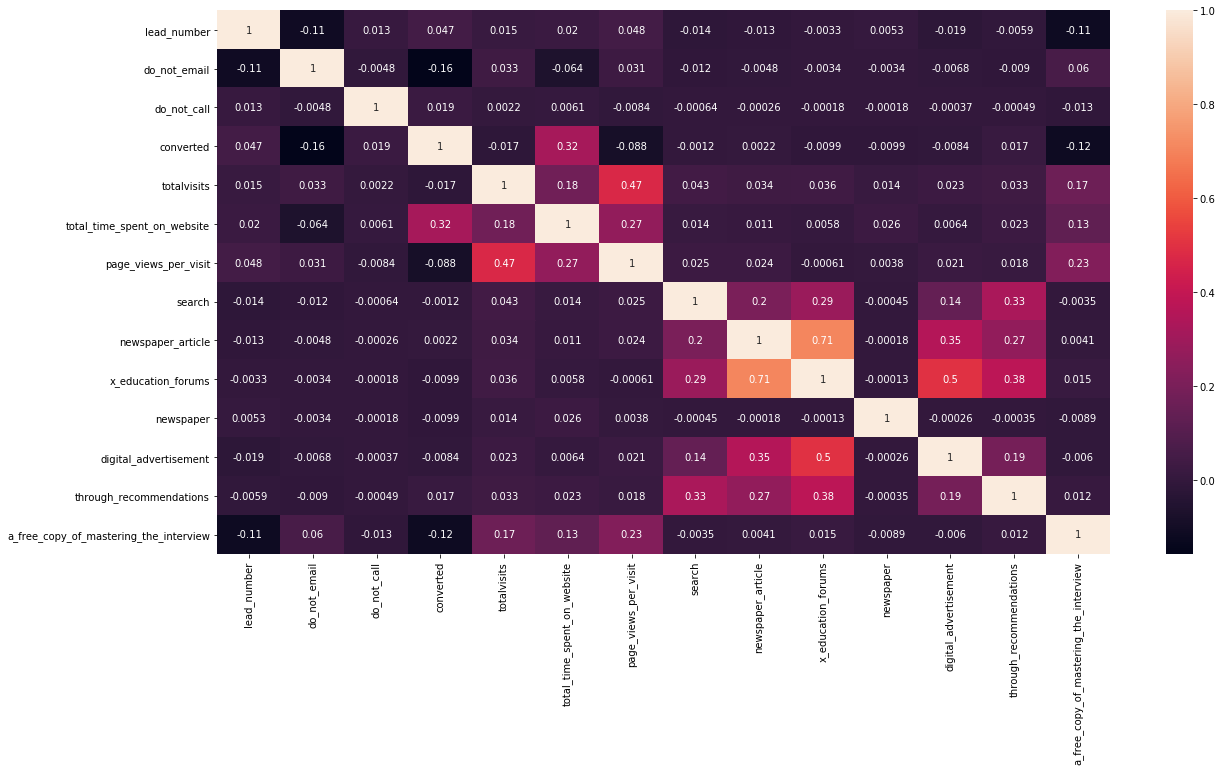

In [31]:
#Heat Map for Correlation 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_main.corr(),annot = True)

In [32]:
# dropping correlated variables 
leads_main.drop(['x_education_forums','page_views_per_visit','through_recommendations'],axis=1,inplace=True)

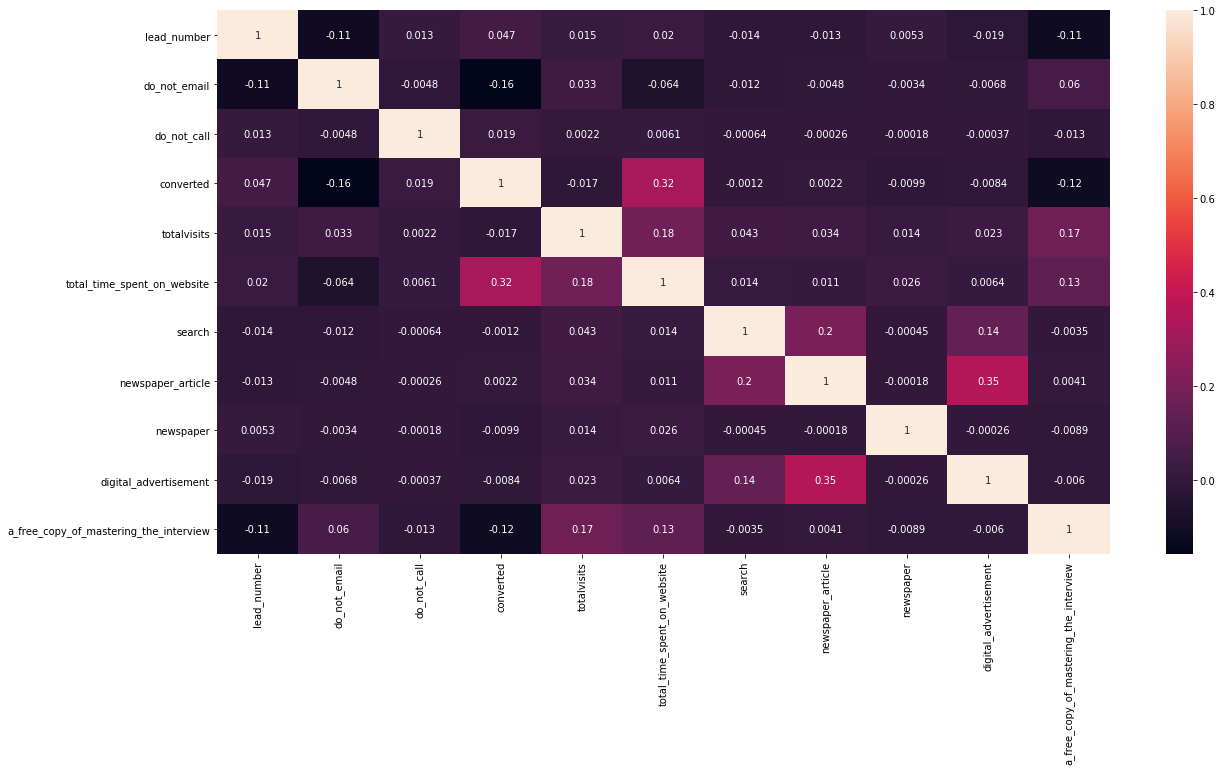

In [33]:
#Heat Map for Correlation 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_main.corr(),annot = True)

In [34]:
# Checking Unique values for each column
print(leads_main.prospect_id .unique())
print("\n")
print(leads_main.lead_number .unique()                                 )
print("\n")
print(leads_main.lead_origin .unique()                                 )
print("\n")
print(leads_main.lead_source .unique()                                 )
print("\n")
print(leads_main.do_not_email.unique()                                 )
print("\n")
print(leads_main.do_not_call .unique()                                 )
print("\n")
print(leads_main.converted   .unique()                                 )
print("\n")
print(leads_main.totalvisits .unique()                                 )
print("\n")
print(leads_main.total_time_spent_on_website.unique()                  )
print("\n")
print(leads_main.last_activity              .unique()                  )
print("\n")
print(leads_main.country                    .unique()                  )
print("\n")
print(leads_main.specialization             .unique()                  )
print("\n")
print(leads_main.how_did_you_hear_about_x_education.unique()           )
print("\n")
print(leads_main.what_is_your_current_occupation.unique()              )
print("\n")
print(leads_main.what_matters_most_to_you_in_choosing_a_course.unique())
print("\n")
print(leads_main.search.unique()                     )
print("\n")
print(leads_main.newspaper_article       .unique()                     )
print("\n")
print(leads_main.newspaper               .unique()                     )
print("\n")
print(leads_main.digital_advertisement   .unique()                     )
print("\n")
print(leads_main.lead_profile                          .unique()       )
print("\n")
print(leads_main.city                                  .unique()       )
print("\n")
print(leads_main.a_free_copy_of_mastering_the_interview  .unique()     )
print("\n")
print(leads_main.last_notable_activity                   .unique()     )

['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


[660737 660728 660727 ... 579545 579538 579533]


['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']


['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'Not Provided' 'WeLearn'
 'Click2call' 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone'
 'Press_Release' 'NC_EDM']


[0 1]


[0 1]


[0 1]


[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  14.  21.  15.  22.  16.  18.  20.  43.  30.  23.  55. 141.  25.
  27.  29.  24.  19.  28.  26.  74.  41.  54. 115. 251.  32.  42.]


[   0  674 1532 ...  483  927 1944]


['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Conv

In [35]:
# Creating dummy variables for categorical variables having more than two distinct values
lead_origin_status = pd.get_dummies(leads_main['lead_origin'], drop_first = True)
lead_origin_status.columns=lead_origin_status.columns+"_"+"lead_origin"
lead_source_status = pd.get_dummies(leads_main['lead_source'], drop_first = True)
lead_source_status.columns=lead_source_status.columns+"_"+"lead_source"
last_activity_status = pd.get_dummies(leads_main['last_activity'], drop_first = True)
last_activity_status.columns=last_activity_status.columns+"_"+"last_activity"
country_status = pd.get_dummies(leads_main['country'], drop_first = True)
country_status.columns=country_status.columns+"_"+"country"
specialization_status = pd.get_dummies(leads_main['specialization'], drop_first = True)
specialization_status.columns=specialization_status.columns+"_"+"specialization"
how_did_you_hear_about_x_education_status = pd.get_dummies(leads_main['how_did_you_hear_about_x_education'], drop_first = True)
how_did_you_hear_about_x_education_status.columns=how_did_you_hear_about_x_education_status.columns+"_"+"edu_stat"
what_is_your_current_occupation_status = pd.get_dummies(leads_main['what_is_your_current_occupation'], drop_first = True)
what_is_your_current_occupation_status.columns=what_is_your_current_occupation_status.columns+"_"+"occu_stat"
what_matters_most_to_you_in_choosing_a_course_status = pd.get_dummies(leads_main['what_matters_most_to_you_in_choosing_a_course'], drop_first = True)
what_matters_most_to_you_in_choosing_a_course_status.columns=what_matters_most_to_you_in_choosing_a_course_status.columns+"_"+"cour_stat"
lead_profile_status = pd.get_dummies(leads_main['lead_profile'], drop_first = True)
lead_profile_status.columns=lead_profile_status.columns+"_"+"lead_profile"
city_status = pd.get_dummies(leads_main['city'], drop_first = True)
city_status.columns=city_status.columns+"_"+"city"
last_notable_activity_status = pd.get_dummies(leads_main['last_notable_activity'], drop_first = True)
last_notable_activity_status.columns=last_notable_activity_status.columns+"_"+"actvt_stats"

In [36]:
leads = pd.concat([leads_main, lead_origin_status,lead_source_status,last_activity_status,country_status,specialization_status,
how_did_you_hear_about_x_education_status,what_is_your_current_occupation_status,what_matters_most_to_you_in_choosing_a_course_status,
lead_profile_status,city_status,last_notable_activity_status], axis = 1)

In [37]:
leads.drop(['lead_origin','lead_source','last_activity','country','specialization','how_did_you_hear_about_x_education'
            ,'what_is_your_current_occupation','what_matters_most_to_you_in_choosing_a_course',
            'lead_profile','city','last_notable_activity'], axis = 1, inplace = True)

In [38]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 9239
Columns: 142 entries, prospect_id to View in browser link Clicked_actvt_stats
dtypes: float64(1), int64(10), object(1), uint8(130)
memory usage: 1.7+ MB


In [39]:
leads.corr()

,lead_number,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,search,newspaper_article,newspaper,digital_advertisement,...,Email Received_actvt_stats,Form Submitted on Website_actvt_stats,Had a Phone Conversation_actvt_stats,Modified_actvt_stats,Olark Chat Conversation_actvt_stats,Page Visited on Website_actvt_stats,SMS Sent_actvt_stats,Unreachable_actvt_stats,Unsubscribed_actvt_stats,View in browser link Clicked_actvt_stats
lead_number,1.000000,-0.110568,0.013409,0.046997,0.015018,0.020202,-0.013721,-0.013287,0.005262,-0.019152,...,-0.013722,0.000874,0.000819,0.060789,-0.011076,0.002907,-0.176468,0.004247,-0.009264,0.001846
do_not_email,-0.110568,1.000000,-0.004793,-0.158212,0.032687,-0.063968,-0.011748,-0.004793,-0.003389,-0.006779,...,-0.003389,-0.003389,-0.012691,0.128563,-0.009532,0.054219,-0.029693,-0.010495,0.243943,-0.003389
do_not_call,0.013409,-0.004793,1.000000,0.018536,0.002231,0.006104,-0.000639,-0.000261,-0.000184,-0.000369,...,-0.000184,-0.000184,-0.000691,0.023260,-0.001740,-0.003096,-0.009775,-0.000995,-0.001169,-0.000184
converted,0.046997,-0.158212,0.018536,1.000000,-0.017285,0.318777,-0.001185,0.002234,-0.009948,-0.008370,...,0.013106,-0.009948,0.042914,-0.243603,-0.034533,-0.037526,0.319301,0.040687,-0.019222,-0.009948
totalvisits,0.015018,0.032687,0.002231,-0.017285,1.000000,0.176542,0.043099,0.033995,0.013930,0.023373,...,0.004946,-0.004037,0.020326,-0.078701,-0.003656,0.227671,-0.036902,0.005378,-0.000677,0.009438
total_time_spent_on_website,0.020202,-0.063968,0.006104,0.318777,0.176542,1.000000,0.013884,0.011012,0.026373,0.006449,...,0.004728,-0.005035,0.020778,-0.094031,-0.006201,0.021672,0.092360,0.010191,-0.007960,-0.009113
search,-0.013721,-0.011748,-0.000639,-0.001185,0.043099,0.013884,1.000000,0.203671,-0.000452,0.143584,...,-0.000452,-0.000452,-0.001693,-0.020441,-0.004264,0.010247,-0.016514,-0.002438,-0.002866,-0.000452
newspaper_article,-0.013287,-0.004793,-0.000261,0.002234,0.033995,0.011012,0.203671,1.000000,-0.000184,0.353323,...,-0.000184,-0.000184,-0.000691,0.023260,-0.001740,-0.003096,-0.009775,-0.000995,-0.001169,-0.000184
newspaper,0.005262,-0.003389,-0.000184,-0.009948,0.013930,0.026373,-0.000452,-0.000184,1.000000,-0.000261,...,-0.000130,-0.000130,-0.000488,-0.007928,-0.001230,-0.002189,-0.006912,-0.000703,-0.000827,-0.000130
digital_advertisement,-0.019152,-0.006779,-0.000369,-0.008370,0.023373,0.006449,0.143584,0.353323,-0.000261,1.000000,...,-0.000261,-0.000261,-0.000977,0.008520,-0.002461,-0.004379,0.011954,-0.001407,-0.001654,-0.000261


##### Test Train Split

In [40]:
# Import for Test Train Split
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = leads.drop(['converted','prospect_id','lead_number'], axis=1)
X.head()

,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,search,newspaper_article,newspaper,digital_advertisement,a_free_copy_of_mastering_the_interview,Landing Page Submission_lead_origin,...,Email Received_actvt_stats,Form Submitted on Website_actvt_stats,Had a Phone Conversation_actvt_stats,Modified_actvt_stats,Olark Chat Conversation_actvt_stats,Page Visited on Website_actvt_stats,SMS Sent_actvt_stats,Unreachable_actvt_stats,Unsubscribed_actvt_stats,View in browser link Clicked_actvt_stats
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# Putting response variable to y
y = leads['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_train[['total_time_spent_on_website','totalvisits']] = scaler.fit_transform(X_train[['total_time_spent_on_website','totalvisits']])

X_train.head()

,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,search,newspaper_article,newspaper,digital_advertisement,a_free_copy_of_mastering_the_interview,Landing Page Submission_lead_origin,...,Email Received_actvt_stats,Form Submitted on Website_actvt_stats,Had a Phone Conversation_actvt_stats,Modified_actvt_stats,Olark Chat Conversation_actvt_stats,Page Visited on Website_actvt_stats,SMS Sent_actvt_stats,Unreachable_actvt_stats,Unsubscribed_actvt_stats,View in browser link Clicked_actvt_stats
3253,0,0,0.279712,-0.366455,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8514,0,0,-0.411182,-0.267699,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
32,0,0,0.049414,-0.556785,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1095,0,0,-0.411182,0.010613,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3568,1,0,-0.641480,-0.538830,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Checking Conversion rate
converted = (sum(leads['converted'])/len(leads['converted'].index))*100
converted

43.14952418198409

Almost 40% of the below get converted

### Model Building

In [47]:
import statsmodels.api as sm

In [49]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5369
Model:                            GLM   Df Residuals:                     5244
Model Family:                Binomial   Df Model:                          124
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        18:42:41   Pearson chi2:                 7.49e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       8.321e+15   1.25e+08   6.64e+07      0.000    8.32e+15    8.32e+15
do_not_email                               -6.473e+14    4.7e+06  -1.38e+08      0.000   -6.47e+14   -6.47e+14
do_not_call                                 2.674e+15   6.77e+07   3.95e+07      0.000    2.67e+15    2.67e+15
totalvisits                                 5.556e+13   1.19e+06   4.68e+07      0.000    5.56e+13    5.56e+13
total_time_spent_on_website                 7.167e+14   1.05e+06   6.81e+08      0.000    7.17e+14    7.17e+14
search                                      1.943e+14   2.21e+07   8.81e+06      0.000    1.94e+14    1.94e+14
newspaper_article                           2.068e+15   5.18e+07   3.99e+07      0.000    2.07e+15    2.07e+15
newspaper                                  -4.684e+15   6.75e+07  -6.94e+07      0.000   -4.68e+15   -4.68e+15
digital_advertisement                      -1.094e+15   3.63e+07  -3.02e+07      0.000   -1.09e+15   -1.09e+15
a_free_copy_of_mastering_the_interview     -1.885e+13   3.48e+06  -5.41e+06      0.000   -1.88e+13   -1.88e+13
Landing Page Submission_lead_origin        -4.138e+14   4.55e+06  -9.09e+07      0.000   -4.14e+14   -4.14e+14
Lead Add Form_lead_origin                  -7.872e+14   4.93e+07   -1.6e+07      0.000   -7.87e+14   -7.87e+14
Lead Import_lead_origin                    -2.769e+15   4.25e+07  -6.52e+07      0.000   -2.77e+15   -2.77e+15
Direct Traffic_lead_source                 -3.841e+15   8.36e+07  -4.59e+07      0.000   -3.84e+15   -3.84e+15
Facebook_lead_source                       -2.769e+15   4.25e+07  -6.52e+07      0.000   -2.77e+15   -2.77e+15
Google_lead_source                         -3.637e+15   8.35e+07  -4.36e+07      0.000   -3.64e+15   -3.64e+15
Live Chat_lead_source                       1.097e+15   9.53e+07   1.15e+07      0.000     1.1e+15     1.1e+15
NC_EDM_lead_source                          3.846e+14   1.08e+08   3.58e+06      0.000    3.85e+14    3.85e+14
Not Provided_lead_source                   -1.473e+15   6.91e+07  -2.13e+07      0.000   -1.47e+15   -1.47e+15
Olark Chat_lead_source                     -2.932e+15   8.38e+07   -3.5e+07      0.000   -2.93e+15   -2.93e+15
Organic Search_lead_source                 -3.784e+15   8.36e+07  -4.53e+07      0.000   -3.78e+15   -3.78e+15
Pay per Click Ads_lead_source              -8.023e+15   1.07e+08  -7.48e+07      0.000   -8.02e+15   -8.02e+15
Press_Release_lead_source                  -6.927e+15   9.64e+07  -7.18e+07      0.000   -6.93e+15   -6.93e+15
Reference_lead_source                      -1.536e+15   6.77e+07  -2.27e+07      0.000   -1.54e+15   -1.54e+15
Referral Sites_lead_source                 -3.891e+15    8.4e+07  -4.63e+07      0.000   -3.89e+15   -3.89e+15
Social Media_lead_source                       3.8639 

##### Feature Selection Using RFE

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False,

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('do_not_call', False, 28),
 ('totalvisits', False, 65),
 ('total_time_spent_on_website', True, 1),
 ('search', False, 49),
 ('newspaper_article', False, 9),
 ('newspaper', True, 1),
 ('digital_advertisement', False, 17),
 ('a_free_copy_of_mastering_the_interview', False, 90),
 ('Landing Page Submission_lead_origin', False, 7),
 ('Lead Add Form_lead_origin', True, 1),
 ('Lead Import_lead_origin', False, 80),
 ('Direct Traffic_lead_source', False, 24),
 ('Facebook_lead_source', False, 70),
 ('Google_lead_source', False, 27),
 ('Live Chat_lead_source', False, 72),
 ('NC_EDM_lead_source', True, 1),
 ('Not Provided_lead_source', True, 1),
 ('Olark Chat_lead_source', True, 1),
 ('Organic Search_lead_source', False, 25),
 ('Pay per Click Ads_lead_source', False, 53),
 ('Press_Release_lead_source', False, 71),
 ('Reference_lead_source', False, 96),
 ('Referral Sites_lead_source', False, 26),
 ('Social Media_lead_source', False, 102),
 ('WeLearn_lead_source', False

In [54]:
col = X_train.columns[rfe.support_]

#### Assessing the model

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5369
Model:                            GLM   Df Residuals:                     5338
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2177.7
Date:                Sun, 03 Mar 2019   Deviance:                       4355.3
Time:                        18:43:34   Pearson chi2:                 5.52e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     23.3286   2.74e+04      0.001      0.999   -5.37e+04    5.38e+04
do_not_email                              -1.2751      0.202     -6.321      0.000      -1.671      -0.880
total_time_spent_on_website                1.0905      0.044     25.002      0.000       1.005       1.176
newspaper                                -25.7992   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Add Form_lead_origin                  3.2411      0.238     13.607      0.000       2.774       3.708
NC_EDM_lead_source                        25.7830   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Not Provided_lead_source                   1.0269      0.814      1.261      0.207      -0.569       2.622
Olark Chat_lead_source                     1.6185      0.123     13.201      0.000       1.378       1.859
Welingak Website_lead_source               3.1141      1.035      3.009      0.003       1.086       5.142
Converted to Lead_last_activity           -1.0288      0.217     -4.737      0.000      -1.454      -0.603
Email Bounced_last_activity               -1.4845      0.529     -2.806      0.005      -2.521      -0.448
Had a Phone Conversation_last_activity     0.3709      0.923      0.402      0.688      -1.438       2.180
Olark Chat Conversation_last_activity     -1.3929      0.197     -7.070      0.000      -1.779      -1.007
Italy_country                            -26.8209   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Saudi Arabia_country                      -1.3305      1.316     -1.011      0.312      -3.910       1.249
United Arab Emirates_country               0.8382      0.607      1.380      0.168      -0.352       2.029
Housewife_occu_stat                       24.1624   3.92e+04      0.001      1.000   -7.69e+04    7.69e+04
Not Provided_occu_stat                    20.0560   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Other_occu_stat                            0.8045      0.724      1.110      0.267      -0.616       2.224
Unemployed_occu_stat                      -0.5612      0.275     -2.040      0.041      -1.100      -0.022
Working Professional_occu_stat             1.6649      0.329      5.056      0.000       1.020       2.310
Not Provided_cour_stat                   -21.3421   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lateral Student_lead_profile               0.4792   4.21e+04   1.14e-05      1.000   -8.25e+04    8.25e+04
Not Provided_lead_profile                -24.0386   2.74e+04     -0.001      0.999   -5.38e+04    5.37e+04
Other Leads_lead_profile                 -23.8171   2.74e+04     -0.001      0.999   -5.38e+04    5.37e+04
Potential Lead_lead_profile              -22.4808   2.74e+04     -0.001      0.999   -5.38e+04    5.37e+04
Student of SomeSchool_lead_profile       -26.2923   2.74e+0

###### Checking VIF

In [56]:
 # Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Not Provided_occu_stat,888.37
20,Not Provided_cour_stat,882.61
22,Not Provided_lead_profile,30.03
18,Unemployed_occu_stat,29.70
24,Potential Lead_lead_profile,9.31
19,Working Professional_occu_stat,4.52
23,Other Leads_lead_profile,3.42
10,Had a Phone Conversation_last_activity,1.91
27,Had a Phone Conversation_actvt_stats,1.90
9,Email Bounced_last_activity,1.89


In [58]:
# Dropping the columns having high p values and rebuilding the model
col = col.drop(['newspaper','NC_EDM_lead_source','Italy_country','Housewife_occu_stat',
                'Not Provided_occu_stat','Lateral Student_lead_profile'], 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5369
Model:                            GLM   Df Residuals:                     5344
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2186.2
Date:                Sun, 03 Mar 2019   Deviance:                       4372.4
Time:                        18:44:15   Pearson chi2:                 5.53e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     22.7056   1.26e+04      0.002      0.999   -2.47e+04    2.47e+04
do_not_email                              -1.2727      0.201     -6.318      0.000      -1.668      -0.878
total_time_spent_on_website                1.0838      0.043     24.947      0.000       0.999       1.169
Lead Add Form_lead_origin                  3.2460      0.238     13.648      0.000       2.780       3.712
Not Provided_lead_source                   1.0189      0.814      1.251      0.211      -0.577       2.615
Olark Chat_lead_source                     1.6106      0.122     13.151      0.000       1.371       1.851
Welingak Website_lead_source               3.1032      1.035      2.999      0.003       1.075       5.131
Converted to Lead_last_activity           -1.0337      0.217     -4.764      0.000      -1.459      -0.608
Email Bounced_last_activity               -1.4878      0.528     -2.815      0.005      -2.524      -0.452
Had a Phone Conversation_last_activity     0.3716      0.922      0.403      0.687      -1.436       2.179
Olark Chat Conversation_last_activity     -1.3984      0.197     -7.100      0.000      -1.784      -1.012
Saudi Arabia_country                      -1.3237      1.316     -1.006      0.314      -3.903       1.255
United Arab Emirates_country               0.8367      0.606      1.380      0.168      -0.352       2.025
Other_occu_stat                            0.6509      0.721      0.903      0.366      -0.762       2.063
Unemployed_occu_stat                      -0.7077      0.268     -2.640      0.008      -1.233      -0.182
Working Professional_occu_stat             1.5194      0.323      4.701      0.000       0.886       2.153
Not Provided_cour_stat                    -1.4193      0.289     -4.905      0.000      -1.986      -0.852
Not Provided_lead_profile                -23.2684   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Other Leads_lead_profile                 -23.0332   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Potential Lead_lead_profile              -21.7118   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Student of SomeSchool_lead_profile       -25.5758   1.26e+04     -0.002      0.998   -2.47e+04    2.47e+04
Email Bounced_actvt_stats                  1.6404      0.711      2.306      0.021       0.246       3.035
Had a Phone Conversation_actvt_stats       1.9767      1.545      1.280      0.201      -1.051       5.004
SMS Sent_actvt_stats                       1.2946      0.088     14.696      0.000       1.122       1.467
Unreachable_actvt_stats                    1.9699      0.620      3.179      0.001       0.755       3.185
==========================================================================================================
"""

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Not Provided_lead_profile,26.02
13,Unemployed_occu_stat,25.61
18,Potential Lead_lead_profile,8.12
15,Not Provided_cour_stat,7.05
14,Working Professional_occu_stat,4.02
17,Other Leads_lead_profile,3.03
8,Had a Phone Conversation_last_activity,1.90
21,Had a Phone Conversation_actvt_stats,1.89
7,Email Bounced_last_activity,1.89
2,Lead Add Form_lead_origin,1.78


In [60]:
# Remove some more columns and rebuilding the model
col = col.drop(['Not Provided_lead_profile','Had a Phone Conversation_last_activity','Saudi Arabia_country',
                'Other_occu_stat','Not Provided_lead_source'], 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5369
Model:                            GLM   Df Residuals:                     5349
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2204.7
Date:                Sun, 03 Mar 2019   Deviance:                       4409.4
Time:                        18:45:06   Pearson chi2:                 5.59e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4500      0.255     -1.763      0.078      -0.950       0.050
do_not_email                             -1.2492      0.198     -6.322      0.000      -1.637      -0.862
total_time_spent_on_website               1.0884      0.043     25.121      0.000       1.003       1.173
Lead Add Form_lead_origin                 3.3613      0.231     14.533      0.000       2.908       3.815
Olark Chat_lead_source                    1.6003      0.122     13.132      0.000       1.361       1.839
Welingak Website_lead_source              2.9764      1.033      2.882      0.004       0.952       5.001
Converted to Lead_last_activity          -1.0614      0.217     -4.888      0.000      -1.487      -0.636
Email Bounced_last_activity              -1.5238      0.528     -2.887      0.004      -2.558      -0.489
Olark Chat Conversation_last_activity    -1.4176      0.197     -7.208      0.000      -1.803      -1.032
United Arab Emirates_country              0.8056      0.607      1.328      0.184      -0.384       1.995
Unemployed_occu_stat                     -0.7847      0.252     -3.118      0.002      -1.278      -0.291
Working Professional_occu_stat            1.4712      0.309      4.760      0.000       0.865       2.077
Not Provided_cour_stat                   -1.5315      0.274     -5.587      0.000      -2.069      -0.994
Other Leads_lead_profile                  0.2117      0.156      1.355      0.176      -0.095       0.518
Potential Lead_lead_profile               1.5208      0.104     14.627      0.000       1.317       1.725
Student of SomeSchool_lead_profile       -2.3778      0.416     -5.712      0.000      -3.194      -1.562
Email Bounced_actvt_stats                 1.6240      0.712      2.282      0.022       0.229       3.019
Had a Phone Conversation_actvt_stats      2.3426      1.243      1.885      0.059      -0.093       4.778
SMS Sent_actvt_stats                      1.2731      0.088     14.529      0.000       1.101       1.445
Unreachable_actvt_stats                   1.9513      0.620      3.149      0.002       0.737       3.166
=========================================================================================================
"""

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Unemployed_occu_stat,2.21
6,Email Bounced_last_activity,1.89
0,do_not_email,1.72
2,Lead Add Form_lead_origin,1.68
13,Potential Lead_lead_profile,1.55
17,SMS Sent_actvt_stats,1.55
3,Olark Chat_lead_source,1.43
10,Working Professional_occu_stat,1.39
4,Welingak Website_lead_source,1.33
15,Email Bounced_actvt_stats,1.28


In [62]:
col = col.drop('United Arab Emirates_country', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5369
Model:                            GLM   Df Residuals:                     5350
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2205.5
Date:                Sun, 03 Mar 2019   Deviance:                       4411.1
Time:                        18:45:36   Pearson chi2:                 5.60e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4461      0.255     -1.748      0.080      -0.946       0.054
do_not_email                             -1.2423      0.197     -6.292      0.000      -1.629      -0.855
total_time_spent_on_website               1.0881      0.043     25.114      0.000       1.003       1.173
Lead Add Form_lead_origin                 3.3567      0.231     14.519      0.000       2.904       3.810
Olark Chat_lead_source                    1.5983      0.122     13.121      0.000       1.360       1.837
Welingak Website_lead_source              2.9751      1.033      2.881      0.004       0.951       4.999
Converted to Lead_last_activity          -1.0661      0.217     -4.910      0.000      -1.492      -0.641
Email Bounced_last_activity              -1.5339      0.528     -2.906      0.004      -2.568      -0.499
Olark Chat Conversation_last_activity    -1.4210      0.197     -7.225      0.000      -1.806      -1.036
Unemployed_occu_stat                     -0.7825      0.252     -3.110      0.002      -1.276      -0.289
Working Professional_occu_stat            1.4776      0.309      4.782      0.000       0.872       2.083
Not Provided_cour_stat                   -1.5315      0.274     -5.588      0.000      -2.069      -0.994
Other Leads_lead_profile                  0.2068      0.156      1.324      0.186      -0.099       0.513
Potential Lead_lead_profile               1.5188      0.104     14.620      0.000       1.315       1.722
Student of SomeSchool_lead_profile       -2.3821      0.416     -5.722      0.000      -3.198      -1.566
Email Bounced_actvt_stats                 1.6220      0.712      2.279      0.023       0.227       3.017
Had a Phone Conversation_actvt_stats      2.3383      1.243      1.882      0.060      -0.097       4.774
SMS Sent_actvt_stats                      1.2676      0.087     14.491      0.000       1.096       1.439
Unreachable_actvt_stats                   1.9461      0.620      3.141      0.002       0.732       3.161
=========================================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Unemployed_occu_stat,2.20
6,Email Bounced_last_activity,1.89
0,do_not_email,1.72
2,Lead Add Form_lead_origin,1.68
12,Potential Lead_lead_profile,1.55
16,SMS Sent_actvt_stats,1.54
3,Olark Chat_lead_source,1.43
9,Working Professional_occu_stat,1.39
4,Welingak Website_lead_source,1.33
14,Email Bounced_actvt_stats,1.28


In [64]:
col = col.drop('Other Leads_lead_profile', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 5369
Model:                            GLM   Df Residuals:                     5351
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2206.4
Date:                Sun, 03 Mar 2019   Deviance:                       4412.8
Time:                        18:45:46   Pearson chi2:                 5.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3820      0.250     -1.526      0.127      -0.873       0.109
do_not_email                             -1.2427      0.198     -6.288      0.000      -1.630      -0.855
total_time_spent_on_website               1.0892      0.043     25.144      0.000       1.004       1.174
Lead Add Form_lead_origin                 3.3628      0.231     14.550      0.000       2.910       3.816
Olark Chat_lead_source                    1.5898      0.122     13.080      0.000       1.352       1.828
Welingak Website_lead_source              2.9492      1.033      2.856      0.004       0.925       4.973
Converted to Lead_last_activity          -1.0492      0.217     -4.837      0.000      -1.474      -0.624
Email Bounced_last_activity              -1.5226      0.528     -2.883      0.004      -2.558      -0.488
Olark Chat Conversation_last_activity    -1.4132      0.197     -7.190      0.000      -1.798      -1.028
Unemployed_occu_stat                     -0.8216      0.250     -3.288      0.001      -1.311      -0.332
Working Professional_occu_stat            1.4520      0.308      4.710      0.000       0.848       2.056
Not Provided_cour_stat                   -1.5919      0.270     -5.891      0.000      -2.122      -1.062
Potential Lead_lead_profile               1.4940      0.102     14.640      0.000       1.294       1.694
Student of SomeSchool_lead_profile       -2.4233      0.415     -5.834      0.000      -3.238      -1.609
Email Bounced_actvt_stats                 1.6073      0.712      2.258      0.024       0.212       3.003
Had a Phone Conversation_actvt_stats      2.3328      1.243      1.876      0.061      -0.104       4.770
SMS Sent_actvt_stats                      1.2505      0.086     14.466      0.000       1.081       1.420
Unreachable_actvt_stats                   1.9336      0.619      3.122      0.002       0.720       3.148
=========================================================================================================
"""

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Unemployed_occu_stat,2.04
6,Email Bounced_last_activity,1.89
0,do_not_email,1.72
2,Lead Add Form_lead_origin,1.68
15,SMS Sent_actvt_stats,1.52
11,Potential Lead_lead_profile,1.51
3,Olark Chat_lead_source,1.42
9,Working Professional_occu_stat,1.35
4,Welingak Website_lead_source,1.32
13,Email Bounced_actvt_stats,1.28


#### Predicting the values 

In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3253    0.167595
8514    0.183142
32      0.140629
1095    0.232890
3568    0.049807
1248    0.664081
3301    0.041690
1654    0.144453
659     0.341553
6995    0.741193
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16759499, 0.18314205, 0.14062879, 0.23289008, 0.04980743,
       0.66408122, 0.04169049, 0.14445318, 0.34155327, 0.74119338])

In [68]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final['ProspectId'] = y_train.index
y_train_pred_final.head()

,converted,converted_Prob,ProspectId
0,0,0.167595,3253
1,1,0.183142,8514
2,0,0.140629,32
3,0,0.232890,1095
4,0,0.049807,3568


In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,converted_Prob,ProspectId,predicted
0,0,0.167595,3253,0
1,1,0.183142,8514,0
2,0,0.140629,32,0
3,0,0.232890,1095,0
4,0,0.049807,3568,0


In [70]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[2614  413]
 [ 609 1733]]


In [71]:
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8096479791395046


#### Plotting ROC Curve

In [72]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_Prob, drop_intermediate = False )

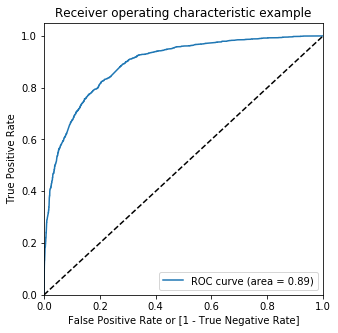

In [74]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

#### Finding Optimal Cutoff Point

In [75]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,ProspectId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167595,3253,0,1,1,0,0,0,0,0,0,0,0
1,1,0.183142,8514,0,1,1,0,0,0,0,0,0,0,0
2,0,0.140629,32,0,1,1,0,0,0,0,0,0,0,0
3,0,0.232890,1095,0,1,1,1,0,0,0,0,0,0,0
4,0,0.049807,3568,0,1,0,0,0,0,0,0,0,0,0


In [76]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.436208  1.000000  0.000000
0.1   0.1  0.618365  0.981640  0.337298
0.2   0.2  0.759918  0.932963  0.626032
0.3   0.3  0.788787  0.906490  0.697721
0.4   0.4  0.804247  0.800598  0.807070
0.5   0.5  0.809648  0.739966  0.863561
0.6   0.6  0.802384  0.681896  0.895606
0.7   0.7  0.782455  0.581554  0.937892
0.8   0.8  0.749302  0.468830  0.966303
0.9   0.9  0.697709  0.328352  0.983482


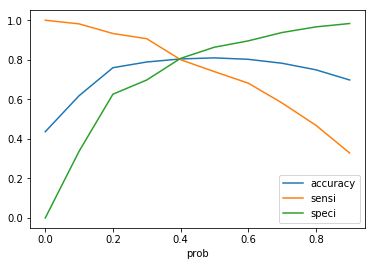

In [77]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [78]:
#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In [79]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,converted,converted_Prob,ProspectId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167595,3253,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.183142,8514,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.140629,32,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.232890,1095,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.049807,3568,0,1,0,0,0,0,0,0,0,0,0,0


In [80]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8042466008567704

In [81]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[2443,  584],
       [ 467, 1875]], dtype=int64)

In [82]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [83]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8005977796754911

In [84]:
# Let us calculate specificity
TN / float(TN+FP)

0.8070697059795177

In [85]:
# Calculate false postive rate - predicting converted when user has not converted
print(FP/ float(TN+FP))

0.1929302940204823


In [86]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7625050833672224


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8395189003436426


#### Precision and Recall

In [88]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[2614,  413],
       [ 609, 1733]], dtype=int64)

In [89]:
# Precision
#TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8075489282385834

In [90]:
# Recall
#TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7399658411614005

#### Find Precision/Recall Score

In [91]:
from sklearn.metrics import precision_score, recall_score


In [92]:
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.8075489282385834

In [93]:
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7399658411614005

#### Precision and recall tradeoff

In [94]:
from sklearn.metrics import precision_recall_curve

In [95]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       1
 9       1
 10      0
 11      0
 12      1
 13      0
 14      0
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
        ..
 5339    1
 5340    0
 5341    1
 5342    0
 5343    0
 5344    0
 5345    1
 5346    0
 5347    0
 5348    0
 5349    1
 5350    1
 5351    1
 5352    0
 5353    1
 5354    1
 5355    0
 5356    1
 5357    1
 5358    0
 5359    1
 5360    1
 5361    1
 5362    0
 5363    0
 5364    0
 5365    1
 5366    0
 5367    0
 5368    1
 Name: converted, Length: 5369, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       0
 8       0
 9       1
 10      1
 11      0
 12      1
 13      0
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      1
 25      

In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

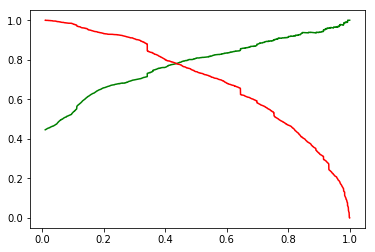

In [97]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

####  Making predictions on the test set

In [98]:
# Scaling Continous variables
X_test[['total_time_spent_on_website','totalvisits']] = scaler.transform(X_test[['total_time_spent_on_website','totalvisits']])

In [100]:
X_test = X_test[col]
X_test.head()

,do_not_email,total_time_spent_on_website,Lead Add Form_lead_origin,Olark Chat_lead_source,Welingak Website_lead_source,Converted to Lead_last_activity,Email Bounced_last_activity,Olark Chat Conversation_last_activity,Unemployed_occu_stat,Working Professional_occu_stat,Not Provided_cour_stat,Potential Lead_lead_profile,Student of SomeSchool_lead_profile,Email Bounced_actvt_stats,Had a Phone Conversation_actvt_stats,SMS Sent_actvt_stats,Unreachable_actvt_stats
6273,0,-0.115076,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
6312,1,-0.957196,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8551,0,-0.957196,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
87,0,-0.783026,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
407,0,1.450656,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [101]:
X_test_sm = sm.add_constant(X_test)

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred[:10]

6273    0.060530
6312    0.130215
8551    0.341553
87      0.055891
407     0.593014
9140    0.171024
5039    0.299227
7632    0.068194
4231    0.289076
2544    0.095677
dtype: float64

In [104]:
# Converting y_pred to a dataframe which is an array
y_pred_arr = pd.DataFrame(y_test_pred)
y_pred_arr.head()

,0
6273,0.060530
6312,0.130215
8551,0.341553
87,0.055891
407,0.593014


In [105]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [106]:
# Putting prospect_id to index
y_test_df['ProspectId'] = y_test_df.index

In [107]:
# Removing index for both dataframes to append them side by side 
y_pred_arr.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_arr],axis=1)
y_pred_final.head()

,converted,ProspectId,0
0,0,6273,0.060530
1,0,6312,0.130215
2,1,8551,0.341553
3,0,87,0.055891
4,1,407,0.593014


In [109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_Prob'})
y_pred_final.head()

,converted,ProspectId,converted_Prob
0,0,6273,0.060530
1,0,6312,0.130215
2,1,8551,0.341553
3,0,87,0.055891
4,1,407,0.593014


In [110]:
y_pred_final['final_predicted'] = y_pred_final.converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,converted,ProspectId,converted_Prob,final_predicted
0,0,6273,0.060530,0
1,0,6312,0.130215,0
2,1,8551,0.341553,0
3,0,87,0.055891,0
4,1,407,0.593014,1


In [111]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)

0.8119026933101651

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1078,  256],
       [ 177,  791]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8171487603305785

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.808095952023988

#### Calculating the lead Score

In [116]:
y_predicted = pd.concat([y_train_pred_final[['ProspectId','converted_Prob']],y_pred_final[['ProspectId','converted_Prob']]],
                        axis=0)
y_predicted.columns = ['ProspectId','lead_score']
y_predicted.head()

,ProspectId,lead_score
0,3253,0.167595
1,8514,0.183142
2,32,0.140629
3,1095,0.232890
4,3568,0.049807


In [117]:
y_predicted['lead_score'] = round(y_predicted['lead_score'],2)*100

In [118]:
leads_main['ProspectId'] = leads.index

In [119]:
# Adding Lead score to the leads dataframe
leads_main = pd.merge(leads_main, y_predicted, how='inner', on='ProspectId')
leads_main.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,last_activity,...,search,newspaper_article,newspaper,digital_advertisement,lead_profile,city,a_free_copy_of_mastering_the_interview,last_notable_activity,ProspectId,lead_score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,Page Visited on Website,...,0,0,0,0,Not Provided,Not Provided,0,Modified,0,34.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,Email Opened,...,0,0,0,0,Not Provided,Not Provided,0,Email Opened,1,28.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,Email Opened,...,0,0,0,0,Potential Lead,Mumbai,1,Email Opened,2,96.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,Unreachable,...,0,0,0,0,Not Provided,Mumbai,0,Modified,3,16.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,Converted to Lead,...,0,0,0,0,Not Provided,Mumbai,0,Modified,4,38.0


In [120]:
leads_main.drop('ProspectId',axis=1,inplace=True)
leads_main.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,last_activity,...,what_matters_most_to_you_in_choosing_a_course,search,newspaper_article,newspaper,digital_advertisement,lead_profile,city,a_free_copy_of_mastering_the_interview,last_notable_activity,lead_score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,Page Visited on Website,...,Better Career Prospects,0,0,0,0,Not Provided,Not Provided,0,Modified,34.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,Email Opened,...,Better Career Prospects,0,0,0,0,Not Provided,Not Provided,0,Email Opened,28.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,Email Opened,...,Better Career Prospects,0,0,0,0,Potential Lead,Mumbai,1,Email Opened,96.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,Unreachable,...,Better Career Prospects,0,0,0,0,Not Provided,Mumbai,0,Modified,16.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,Converted to Lead,...,Better Career Prospects,0,0,0,0,Not Provided,Mumbai,0,Modified,38.0


In [121]:
leads_main.loc[leads_main.lead_score>80,['lead_profile','converted','lead_score']]

,lead_profile,converted,lead_score
2,Potential Lead,1,96.0
5,Potential Lead,1,92.0
10,Potential Lead,1,91.0
21,Potential Lead,1,81.0
24,Potential Lead,1,86.0
33,Potential Lead,1,93.0
54,Potential Lead,1,89.0
55,Potential Lead,1,99.0
57,Potential Lead,1,96.0
61,Potential Lead,0,82.0
